# Example - usALEX histogram

*This notebook is part of smFRET burst analysis software [FRETBursts](http://tritemio.github.io/FRETBursts/).*

> In this notebook shows how to plot different styles of us-ALEX histograms and $E$ and $S$ marginal distributions.
> For a complete tutorial on burst analysis see 
> [FRETBursts - us-ALEX smFRET burst analysis](FRETBursts - us-ALEX smFRET burst analysis.ipynb).

# Load software

## FRETBursts

In [1]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.4.6-12-gef941ff).

 If you use this software in a publication, please cite it as:

   FRETBursts - An opensource single-molecule FRET bursts analysis toolkit.
   A. Ingargiola 2014. http://tritemio.github.io/FRETBursts

--------------------------------------------------------------

/Users/anto/anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sns = init_notebook()

/Users/anto/anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Interactive widgets

In [3]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import display, display_png, display_svg, clear_output
from IPython.core.pylabtools import print_figure

/Users/anto/anaconda/envs/py3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Download the sample file

In [4]:
url = 'http://files.figshare.com/1839121/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'
download_file(url, save_dir='./data')

URL:  http://files.figshare.com/1839121/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
File: 0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
 
File already on disk: /Users/anto/src/FRETBursts/notebooks/data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5 
Delete it to re-download.


# Select a data file

In [5]:
file_name = "0023uLRpitc_NTP_20dT_0.5GndCl.hdf5"

# Here the folder is the subfolder "data" of current notebook folder
folder_name = './data/'
full_fname = folder_name + file_name
full_fname

'./data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'

Let's check that the file exists:

In [6]:
import os
if os.path.isfile(full_fname):
    print("Perfect, I found the file!")
else:
    print("Sorry, I can't find the file:\n", full_fname)

Perfect, I found the file!


# Load the selected file

#donor: 721537  #acceptor: 1537985 

 - Calculating BG rates ... 

[DONE]


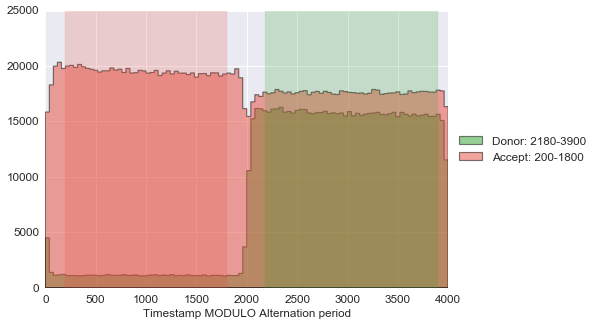

In [7]:
d = loader.photon_hdf5(full_fname)
#d.add(det_donor_accept=(0, 1), alex_period=4000, 
#      offset=700, D_ON=(2180, 3900), A_ON=(200, 1800))
bpl.plot_alternation_hist(d)
loader.alex_apply_period(d)
d.calc_bg(bg.exp_fit, time_s=1000, tail_min_us=(800, 4000, 1500, 1000, 3000))

# Burst search

In [8]:
d.burst_search(L=10, m=10, F=6)
ds = Sel(d, select_bursts.size, add_naa=True, th1=30)

 - Performing burst search (verbose=False) ...

[DONE]


 - Calculating burst periods ...

[DONE]


 - Counting D and A ph and calculating FRET ... 


   - Applying background correction.


   - Applying leakage correction.


   - Applying direct excitation correction.


   [DONE Counting D/A]


In [9]:
#dplot(ds, hist_fret)
#dplot(ds, hist_S);

In [10]:
#ds.E_fitter.fit_histogram(mfit.factory_three_gaussians())

# ALEX plots

## Basics

We can make a simple E-S scatter plot with `scatter_alex`:

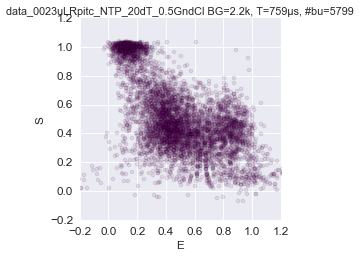

In [11]:
dplot(ds, scatter_alex, figsize=(4,4), mew=1, ms=4, mec='black', color='purple');

We can also plot the ALEX histogram with a scatterplot overlay using `hist2d_alex`:

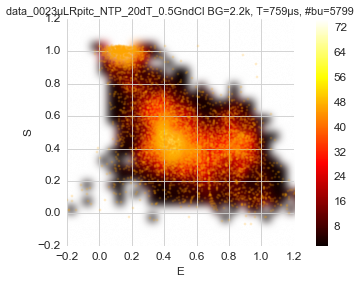

In [12]:
dplot(ds, hist2d_alex);

# ALEX Joint Plot

In [13]:
# Fit E and S to a model and compute KDE
bext.bursts_fitter(ds, 'E', binwidth=0.03, bandwidth=0.03, model=mfit.factory_three_gaussians())
bext.bursts_fitter(ds, 'S', binwidth=0.03, bandwidth=0.03, model=mfit.factory_two_gaussians())

In [14]:
#sns.set_style('darkgrid')

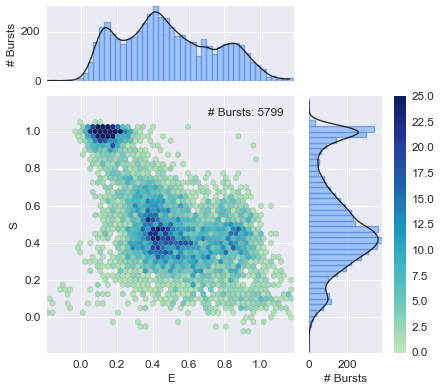

In [15]:
alex_jointplot(ds)

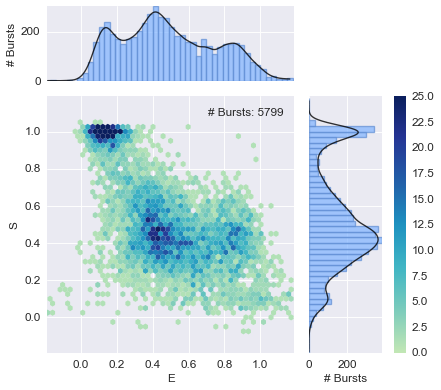

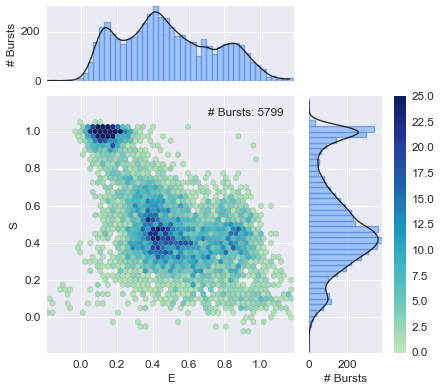

In [16]:
alex_jointplot(ds, joint_kws = dict(edgecolor='none'))

alex_jointplot(ds, joint_kws = {})

In [17]:
sns.set_style('whitegrid')

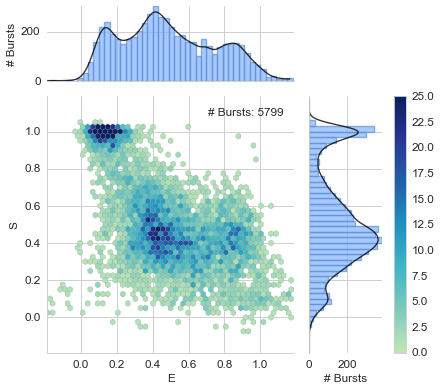

In [18]:
alex_jointplot(ds)

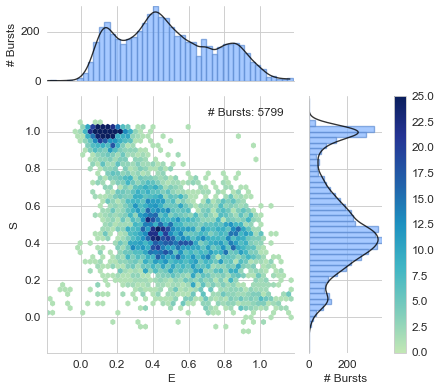

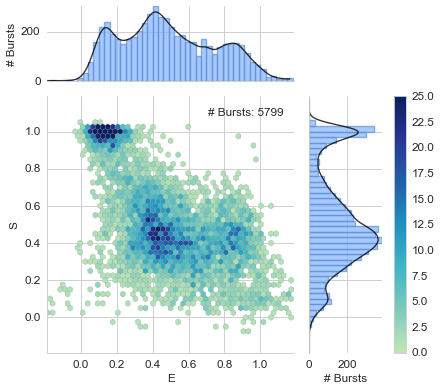

In [19]:
alex_jointplot(ds, joint_kws = dict(edgecolor='none'))

alex_jointplot(ds, joint_kws = {})

## Interactive plot

In [20]:
sns.set_style('whitegrid')

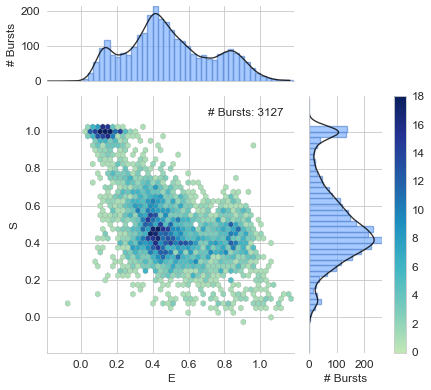

None

In [21]:
@interact(cmap_compensate = False,
          overlay = widgets.RadioButtons(values=['fit model', 'KDE']),
          binwidth = widgets.FloatText(value=0.03, min=0.01, max=1),
          bandwidth = widgets.FloatText(value=0.03, min=0.01, max=1),
          gridsize = (10, 100),
          min_size=(10, 500, 5),
          cmap=widgets.Dropdown(value='YlGnBu_crop', 
                                options=['YlGnBu_crop', 'YlOrRd', 'Blues', 'PuBuGn', 
                                        'PuBu', 'GnBu', 'YlGnBu', 'afmhot', 'alex_lv',
                                        'copper', 'summer', 'winter', 'cubehelix']),
          reverse_cmap = False,
          vmax_fret = True,
          )
def plot_(min_size=50, cmap_compensate=False, overlay='KDE', binwidth=0.03, bandwidth=0.03, gridsize=50, cmap='YlGnBu_crop', 
          reverse_cmap=False, vmax_fret=True):
    dx = Sel(d, select_bursts.size, add_naa=True, th1=min_size)
    bext.bursts_fitter(dx, 'E', binwidth=binwidth, bandwidth=bandwidth, 
                       model=mfit.factory_three_gaussians())
    bext.bursts_fitter(dx, 'S', binwidth=binwidth, bandwidth=bandwidth, 
                       model=mfit.factory_two_gaussians())    
    
    if reverse_cmap: cmap += '_r'

    if binwidth < 0.01: binwidth = 0.01
    if bandwidth < 0.01: bandwidth = 0.01
    if overlay == 'fit model':
        marginal_kws = dict(binwidth=binwidth, show_model=True)
    else:
        marginal_kws = dict(binwidth=binwidth, show_kde=True, bandwidth=bandwidth)
    alex_jointplot(dx, cmap=cmap, gridsize=gridsize, vmax_fret=vmax_fret, 
                   cmap_compensate=cmap_compensate, marginal_kws=marginal_kws, joint_kws=dict(edgecolor='grey', lw=0.2))
    
    fig = gcf()
    plt.close()
    display(fig)

# Notebook style

In [22]:
from IPython.core.display import HTML
HTML(open("./styles/custom2.css", "r").read())